Model of a generalized Josephson Junction Array

Authors: Cliff Sun, Harshvardhan, Alexey Bezryadin

In [207]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import quad 

In [208]:
def generate_random_numbers(n):
    random_numbers = [random.uniform(0.9, 1) for _ in range(n)]
    return random_numbers

# Example: Generate 5 random numbers
num_of_junctions = 47
random_numbers = np.array(np.sort(generate_random_numbers(2 * num_of_junctions)))

In [209]:
# arrayOfJunctions = [0, 0.2, 0.4, 0.6, 0.9, 1] # Where the junctions are located; must be even amount of junctions (includes 0 and 1)
arrayOfJunctions = random_numbers
# arrayOfJunctions = [0, 0.001, 0.25, 0.251, 0.5, 0.501, 0.75, 0.751, 0.999, 1]
# arrayOfJunctions = [0, 0.001, 0.999, 1]
arrayOfJunctions = [0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9]
arrayOfJunctions = np.concatenate([arrayOfJunctions, random_numbers])
arrayOfJunctions[-1] = 1
print(arrayOfJunctions)
print(len(arrayOfJunctions))

[0.         0.4        0.5        0.7        0.8        0.9
 0.90020711 0.90132904 0.90271104 0.90418971 0.90420333 0.90585095
 0.90651265 0.91039516 0.91131988 0.91341597 0.91515479 0.91524029
 0.91670965 0.91747702 0.91818003 0.91909699 0.91918411 0.92005352
 0.92119361 0.92139638 0.9215695  0.9227807  0.92619321 0.92739281
 0.92748501 0.92981497 0.93074541 0.93100755 0.9310702  0.93139301
 0.93192788 0.93215992 0.93485938 0.93592574 0.93765492 0.938982
 0.93987557 0.94042866 0.94094083 0.94156237 0.94241414 0.94364422
 0.9447494  0.94574397 0.94647364 0.94829178 0.9483615  0.94926071
 0.95041592 0.95101871 0.95157554 0.95214783 0.95372428 0.95505905
 0.95549011 0.95844768 0.95863256 0.96007475 0.96081538 0.96443615
 0.96546247 0.96546733 0.96587129 0.96599631 0.96847902 0.96867313
 0.97064513 0.9708081  0.972382   0.97384271 0.97899587 0.98152266
 0.98218941 0.98322344 0.98422401 0.98470913 0.98580455 0.98593349
 0.98664601 0.98675391 0.98708109 0.9874689  0.98758422 0.98954123
 0.9

In [210]:
critical_currents_density = np.ones(int(len(arrayOfJunctions) / 2)) # all the critical currents for each junction (Critical Currents are assumed to be 1 by default)

criticalCurrents = []

junctionWidths = []

for i in range(len(arrayOfJunctions)//2):
    junctionWidths.append(arrayOfJunctions[2*i+1] - arrayOfJunctions[2*i])

for i in range (len(junctionWidths)):
    criticalCurrents.append(junctionWidths[i] * critical_currents_density[i])

print(criticalCurrents)

print(np.sum(criticalCurrents))

[0.4, 0.19999999999999996, 0.09999999999999998, 0.0011219266286697227, 0.001478674861705609, 0.0016476165483114702, 0.0038825052665286686, 0.002096084066403048, 8.550148289954151e-05, 0.0007673694268660602, 0.0009169561477054833, 0.0008694110916007691, 0.00020276489051218594, 0.0012111979929917416, 0.0011995971500777802, 0.002329967221361806, 0.00026213656662688045, 0.0003228185351721313, 0.0002320363472317899, 0.001066355301243882, 0.001327082705374849, 0.0005530837506704245, 0.0006215356833031427, 0.0012300747714414362, 0.000994573010124733, 0.0018181309735244566, 0.0008992144569205385, 0.0006027884678747597, 0.000572290427200639, 0.001334769423256943, 0.002957571034952311, 0.001442187780750892, 0.003620778232999222, 4.86022233303629e-06, 0.00012502535337388654, 0.00019410904316985444, 0.00016296234887269723, 0.0014607153339303292, 0.0025267896985144978, 0.0010340225524111402, 0.00048512467012185034, 0.0001289366897402333, 0.00010790507376556846, 0.00038781183885694404, 0.00195701531

prints out the elements in the junction in a better format

In [211]:
index = 0
while (index < (len(arrayOfJunctions) - 1)):
    if (index == len(arrayOfJunctions) - 2):
        print(str(arrayOfJunctions[index]) + " - " + str(arrayOfJunctions[index + 1]), end = " ")
    else:
        print(str(arrayOfJunctions[index]) + " - " + str(arrayOfJunctions[index + 1]) + ",", end = " ")
    index += 2

0.0 - 0.4, 0.5 - 0.7, 0.8 - 0.9, 0.9002071146610512 - 0.9013290412897209, 0.9027110375664611 - 0.9041897124281667, 0.904203331998618 - 0.9058509485469295, 0.9065126499864385 - 0.9103951552529672, 0.9113198812839665 - 0.9134159653503695, 0.9151547865398605 - 0.91524028802276, 0.9167096461393913 - 0.9174770155662574, 0.9181800323586271 - 0.9190969885063326, 0.9191841128562891 - 0.9200535239478899, 0.9211936116383997 - 0.9213963765289119, 0.9215694987220043 - 0.9227806967149961, 0.9261932121377744 - 0.9273928092878522, 0.9274850061626527 - 0.9298149733840145, 0.9307454108358283 - 0.9310075474024552, 0.9310701961615904 - 0.9313930146967625, 0.9319278821650774 - 0.9321599185123092, 0.934859381163762 - 0.9359257364650059, 0.9376549202785076 - 0.9389820029838825, 0.9398755716257264 - 0.9404286553763969, 0.9409408325648124 - 0.9415623682481156, 0.9424141440882071 - 0.9436442188596486, 0.9447494001841054 - 0.9457439731942301, 0.9464736442539449 - 0.9482917752274693, 0.9483615002902779 - 0.94926

Parameters for Current -> Magnetic Field, Junction Locations, Critical Currents, Initial Phase Difference

B is the integer value of flux quanta present in the SQUID

In [212]:
def current(B, arrJ, arrC, y): # y is initial phase difference of the whole circuit, B is the magnetic field, arrJ is the location of junctions, arrC is critical current associated with each junction
    curr = 0 # summation of all currents in the entire junction
    limit = int(len(arrJ) / 2) # number of junctions in the SQUID
    numOfSegments = 0
    for n in range(limit):
        numOfSegments = 5 if (arrJ[2 * n + 1] - arrJ[2 * n]) < 0.05 else int(100 * (arrJ[2 * n + 1] - arrJ[2 * n]))
        sizeOfSegment = float((arrJ[2 * n + 1] - arrJ[2 * n]) / numOfSegments)
        for i in range(numOfSegments):
            curr += arrC[n] * np.sin(y + (2 * np.pi * B) * (arrJ[2 * n] + i * sizeOfSegment)) * (1/numOfSegments)

    # phase difference evolves according to 2 * pi * B

    # curr += (critical current element in array)(sin(y + (2 * pi * B) * length)
    return curr

In [213]:
def maxCurrent(B, arrayJ, arrayC): # Spits out the maximum current by varying the gauge invariant phase of the left end (free parameter) gamma
    Y=np.linspace(0, 2*np.pi, 150)
    dummyArray=[]
    for gamma in Y:
        dummyArray.append(current(B, arrayJ, arrayC, gamma))
    return max(dummyArray)

In [214]:
MagField = np.linspace(-10, 10, 10000) # an array of Magnetic Fields ranging from 0 to 100 with 5000 total elements

The 2 lines below is where the useful section of the code is for modeling a SQUID

In [215]:
IMaxPoint = []

In [216]:
length = len(MagField)
for i in range(length):
    IMaxPoint.append(maxCurrent(MagField[i], arrayOfJunctions, criticalCurrents) / np.sum(criticalCurrents)) # This integer represents the number of segments you want to cut each junction up into (the higher the number, the better the approximation)

The 2 lines above is where the useful section of the code is for modeling a SQUID

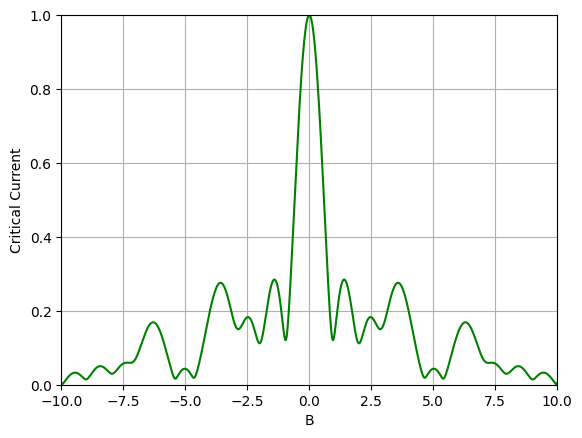

In [217]:
plt.plot(MagField, IMaxPoint, 'g-')
plt.xlabel('B')
plt.ylabel('Critical Current')  
plt.ylim(0,1) 
plt.xlim(-10,10)
plt.grid()            
plt.show()
# plt.savefig('10-random-junctions:B=-5to5.png')

In [218]:
print(max(IMaxPoint))

0.9999821298048297


In [219]:
print(min(IMaxPoint))

0.0019011346404689267


In [220]:
print(np.mean(junctionWidths))

0.015084952542034536


In [221]:
print(np.std(junctionWidths))

0.06304406326112647


In [222]:
diff = []

for n in range(int(len(IMaxPoint)/2)):
    diff.append(np.abs(IMaxPoint[int(len(MagField)/2)-n] - IMaxPoint[int(len(MagField)/2)+n]))

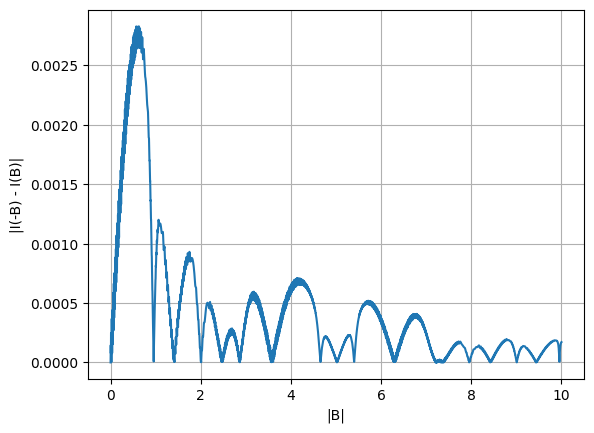

In [223]:
plt.plot(MagField[int(len(MagField)/2):], diff)
plt.xlabel('|B|')
plt.ylabel('|I(-B) - I(B)|')
# plt.ylim(0,1)
plt.grid()
plt.show()